# **Aplicação de lógica nebulosa para maquina de lavar (*Fuzzy*)**


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Tempo utilizado será  24.829723225030097


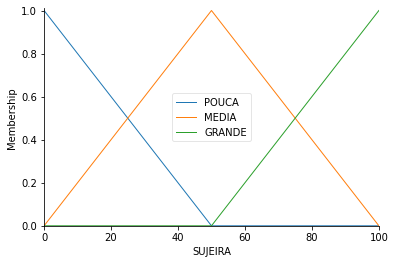

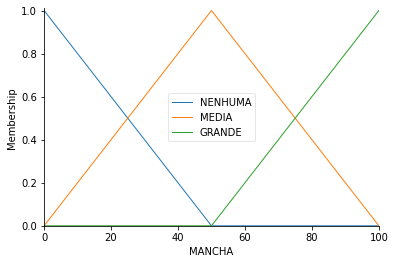

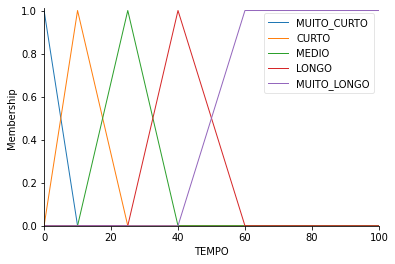

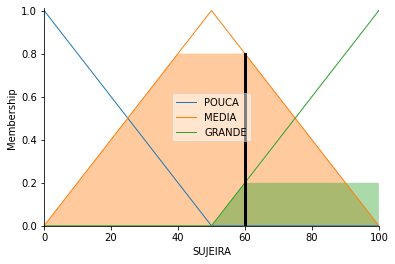

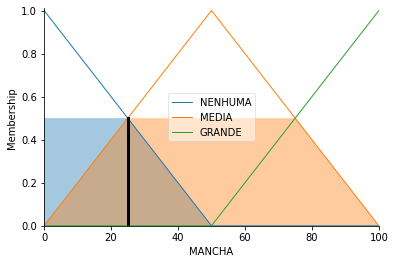

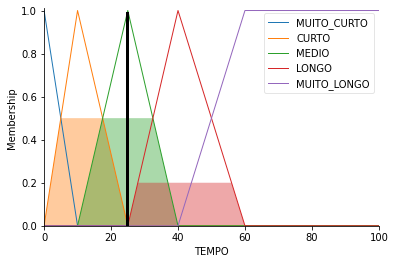

In [ ]:
# -*- coding: utf-8 -*-
"""IA - Exercício - 10 - CONTROLADOR FUZZY - MÁQUINA DE LAVAR.pdf

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1LNuOHbSsnNX9_d7Q2MjzrCwO4z6cEfLB

# **Exemplo de aplicação de lógica nebulosa (*Fuzzy*)**

> Objetivo do Sistema: *um analista de projetos de uma empresa quer determinar o **risco** de um determinado projeto (saída), dependendo da quantidade de **dinheiro** e de **pessoas** envolvidas no projeto (entradas).*

* **Entrada**

> *Quantidade de Dinheiro*:
   >> Universo (intervalo de valores nítidos/crisp): 0 a 100 

   >> Conjuntos *fuzzy* (valores difusos): **inadequado**, **médio** e **adequado**.

> *Quantidade de Pessoas*:
   >> Universo (intervalo de valores nítidos/crisp): 0 a 100 

   >> Conjuntos *fuzzy* (valores difusos): **baixo** e **alto**.

*   **Saída**

> *Risco*
   >> Universo (intervalo de valores nítidos/crisp): 0 a 100 

   >> Conjuntos *fuzzy* (valores difusos): **pequeno**, **normal** e **alto**.


## Base de conhecimento (regras de decisão)

> **SE** dinheiro é *adequado* **OU** pessoal é *pequeno* **ENTÃO** risco é *pequeno*

> **SE** dinheiro é *médio* **E** pessoal é *alto*, **ENTÃO** risco é *normal*

> **SE** dinheiro é *inadequado*, **ENTÃO** risco é *alto*

---
## Referências
{1} SCIKIT-FUZZY. Scikit-Fuzzy Overview. Disponível em: https://pythonhosted.org/scikit-fuzzy/overview.html.

{2} PISTORI, H. Exemplo de aplicação de lógica nebulosa (fuzzy). Disponível em: https://colab.research.google.com/drive/13nqdB-kHLIMUxemuQJfnV1bqrLzM3hPS.

### **Instalação do Pacote** *skfuzzy*
"""

# Instale o pacote skfuzzy
!pip install scikit-fuzzy

"""### Criação das **Variáveis** e de seus respectivos **Termos Lingúisticos**"""

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Variáveis Linguísticas
sujeira = ctrl.Antecedent(np.arange(0,101,1), 'SUJEIRA')
mancha = ctrl.Antecedent(np.arange(0,101,1), 'MANCHA')
tempo = ctrl.Consequent(np.arange(0,101,1), 'TEMPO')

# Conjuntos de Termos Linguísticos (membership function tipo trapezoidal)
sujeira['POUCA'] = fuzz.trapmf(sujeira.universe, [0,0,0,50])
sujeira['MEDIA'] = fuzz.trapmf(sujeira.universe, [0,50,50,100])
sujeira['GRANDE'] = fuzz.trapmf(sujeira.universe, [50,100,100,100])

mancha['NENHUMA'] = fuzz.trapmf(mancha.universe, [0,0,0,50])
mancha['MEDIA'] = fuzz.trapmf(mancha.universe, [0,50,50,100])
mancha['GRANDE'] = fuzz.trapmf(mancha.universe, [50,100,100,100])

tempo['MUITO_CURTO'] = fuzz.trapmf(tempo.universe, [0,0,0,10])
tempo['CURTO'] = fuzz.trapmf(tempo.universe, [0,10,10,25])
tempo['MEDIO'] = fuzz.trapmf(tempo.universe, [10,25,25,40])
tempo['LONGO'] = fuzz.trapmf(tempo.universe, [25,40,40,60])
tempo['MUITO_LONGO'] = fuzz.trapmf(tempo.universe, [40,60,100,100])

"""### Mostrando graficamente as partições dos Universos **DINHEIRO**, **PESSOAL**  e **RISCO**"""

sujeira.view()
mancha.view()
tempo.view()

"""### Criando a **Base de Regras**"""

regra1 = ctrl.Rule(sujeira['POUCA'] & mancha['NENHUMA'], tempo['MUITO_CURTO'])
regra2 = ctrl.Rule(sujeira['POUCA'] & mancha['MEDIA'], tempo['MEDIO'])
regra3 = ctrl.Rule(sujeira['POUCA'] & mancha['GRANDE'], tempo['LONGO'])

regra4 = ctrl.Rule(sujeira['MEDIA'] & mancha['NENHUMA'], tempo['CURTO'])
regra5 = ctrl.Rule(sujeira['MEDIA'] & mancha['MEDIA'], tempo['MEDIO'])
regra6 = ctrl.Rule(sujeira['MEDIA'] & mancha['GRANDE'], tempo['LONGO'])

regra7 = ctrl.Rule(sujeira['GRANDE'] & mancha['NENHUMA'], tempo['MEDIO'])
regra8 = ctrl.Rule(sujeira['GRANDE'] & mancha['MEDIA'], tempo['LONGO'])
regra9 = ctrl.Rule(sujeira['GRANDE'] & mancha['GRANDE'], tempo['MUITO_LONGO'])

"""### Criando o **Controlador Nebuloso**, definindo os **Entradas** e calculando o **Resultado**"""

tempo_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8,regra9])
tempo_simulado = ctrl.ControlSystemSimulation(tempo_ctrl)

tempo_simulado.input['SUJEIRA'] = 60
tempo_simulado.input['MANCHA'] = 25

#Computando o resultado
tempo_simulado.compute()

"""### Apresentando **Graficamente** o **Resultado**"""

sujeira.view(sim=tempo_simulado)
mancha.view(sim=tempo_simulado)
tempo.view(sim=tempo_simulado)
print("Tempo utilizado será ", tempo_simulado.output['TEMPO'])